# AI Job Market Intelligence - EDA & KPI Analysis 
**Objective:** Analyze AI job market trends including salaries, AI adoption, skills, automation risk, and projected growth.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional for interactive charts
#import plotly.express as px


In [2]:
# Load CSV
# df = pd.read_csv('../data/ai_job_market_insights.csv')
# # Save cleaned dataset with formatted salaries
# df.to_excel('../data/ai_job_market_clean.xlsx', index=False)


# # Quick check
# df.head()
# df.info()
# df.describe(include='all')

# import pandas as pd

# Load dataset
df = pd.read_csv('../data/ai_job_market_insights.csv')

# Quick look at the dataset
print("First 5 rows:\n", df.head())
print("\nDataset Info:")
print(df.info())





First 5 rows:
                Job_Title       Industry Company_Size   Location  \
0  Cybersecurity Analyst  Entertainment        Small      Dubai   
1   Marketing Specialist     Technology        Large  Singapore   
2          AI Researcher     Technology        Large  Singapore   
3          Sales Manager         Retail        Small     Berlin   
4  Cybersecurity Analyst  Entertainment        Small      Tokyo   

  AI_Adoption_Level Automation_Risk     Required_Skills     Salary_USD  \
0            Medium            High        UX/UI Design  111392.165243   
1            Medium            High           Marketing   93792.562466   
2            Medium            High        UX/UI Design  107170.263069   
3               Low            High  Project Management   93027.953758   
4               Low             Low          JavaScript   87752.922171   

  Remote_Friendly Job_Growth_Projection  
0             Yes                Growth  
1              No               Decline  
2          

In [ ]:
# Format salary with commas, 2 decimals, and $ at the end
df['Salary_USD_Display'] = df['Salary_USD'].apply(lambda x: f"{x:,.2f}$")

# Check the first few rows
print(df[['Job_Title', 'Salary_USD_Display']].head())


               Job_Title Salary_USD_Display
0  Cybersecurity Analyst        111,392.17$
1   Marketing Specialist         93,792.56$
2          AI Researcher        107,170.26$
3          Sales Manager         93,027.95$
4  Cybersecurity Analyst         87,752.92$


# Descriptive Statastics

In [3]:
# Numerical summary
print("Numerical Summary:\n", df.describe())

# Categorical summary
for col in ['Job_Title', 'Industry', 'Company_Size', 'AI_Adoption_Level', 'Automation_Risk', 'Remote_Friendly', 'Job_Growth_Projection']:
    print(f"\nValue counts for {col}:\n", df[col].value_counts())


Numerical Summary:
           Salary_USD
count     500.000000
mean    91222.390974
std     20504.291453
min     31969.526346
25%     78511.514863
50%     91998.195286
75%    103971.282092
max    155209.821614

Value counts for Job_Title:
 Job_Title
Data Scientist           62
HR Manager               57
Cybersecurity Analyst    55
UX Designer              54
AI Researcher            51
Sales Manager            49
Marketing Specialist     48
Operations Manager       44
Software Engineer        41
Product Manager          39
Name: count, dtype: int64

Value counts for Industry:
 Industry
Manufacturing         58
Education             57
Technology            56
Telecommunications    53
Finance               53
Energy                49
Entertainment         47
Retail                46
Healthcare            42
Transportation        39
Name: count, dtype: int64

Value counts for Company_Size:
 Company_Size
Small     171
Large     166
Medium    163
Name: count, dtype: int64

Value counts for

In [11]:
# Missing values
print("Missing values per column:\n", df.isnull().sum())

# Duplicates
print("Number of duplicate rows:", df.duplicated().sum())


Missing values per column:
 Job_Title                0
Industry                 0
Company_Size             0
Location                 0
AI_Adoption_Level        0
Automation_Risk          0
Required_Skills          0
Salary_USD               0
Remote_Friendly          0
Job_Growth_Projection    0
dtype: int64
Number of duplicate rows: 0


# Universal Visuals

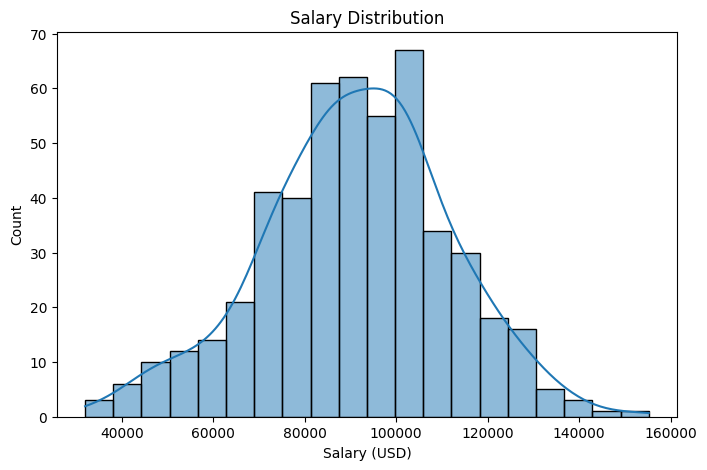

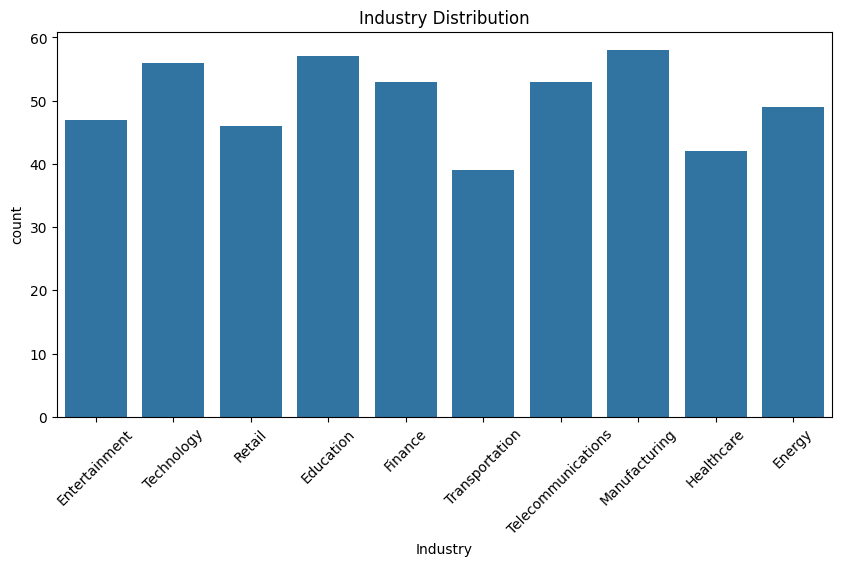

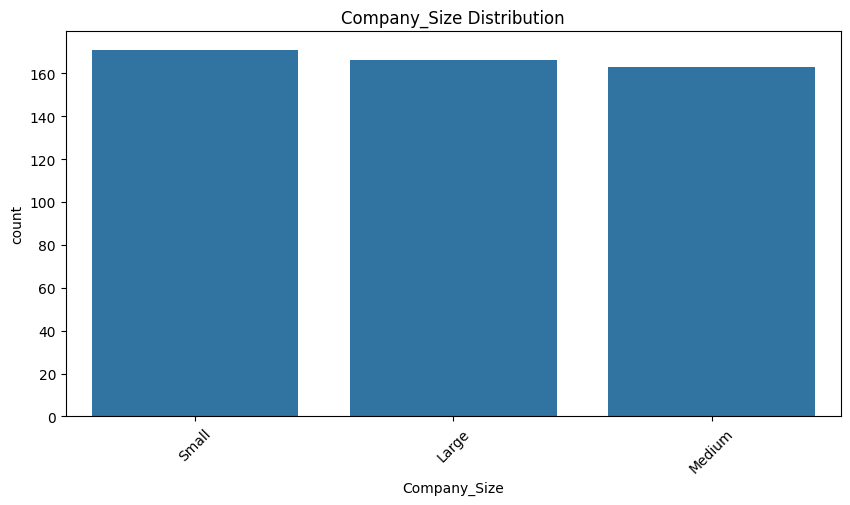

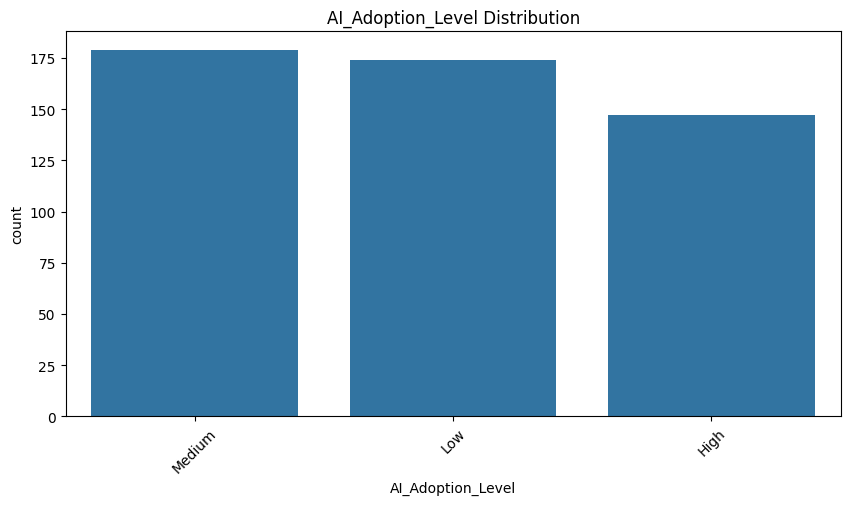

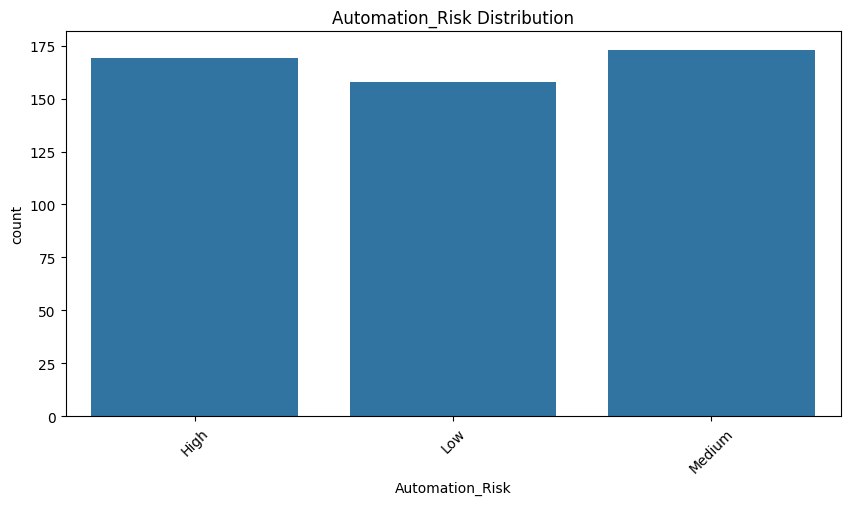

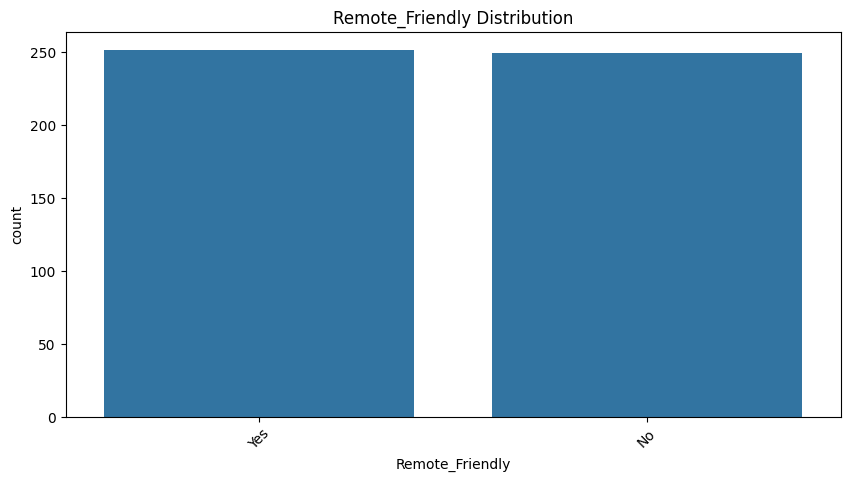

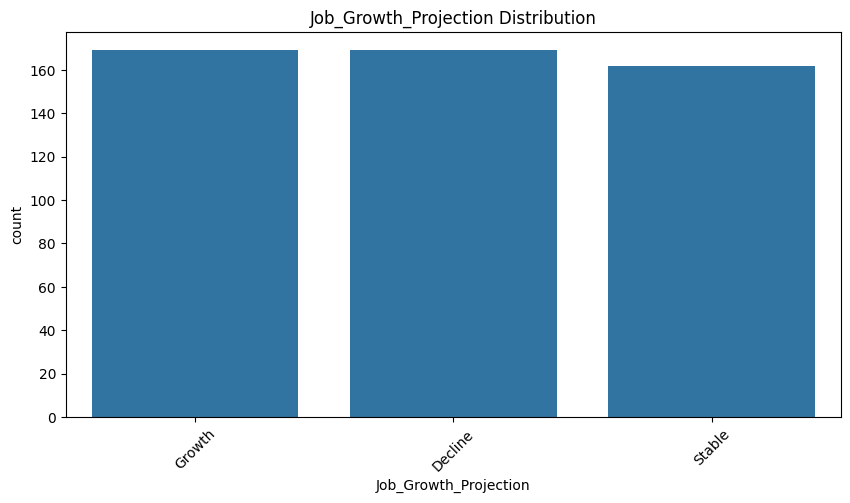

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Salary Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Salary_USD'], bins=20, kde=True)
plt.title('Salary Distribution')
plt.xlabel('Salary (USD)')
plt.show()

# Categorical Columns Count
categorical_cols = ['Industry', 'Company_Size', 'AI_Adoption_Level', 'Automation_Risk', 'Remote_Friendly', 'Job_Growth_Projection']

for col in categorical_cols:
    plt.figure(figsize=(10,5))
    sns.countplot(x=col, data=df)
    plt.xticks(rotation=45)
    plt.title(f'{col} Distribution')
    plt.show()


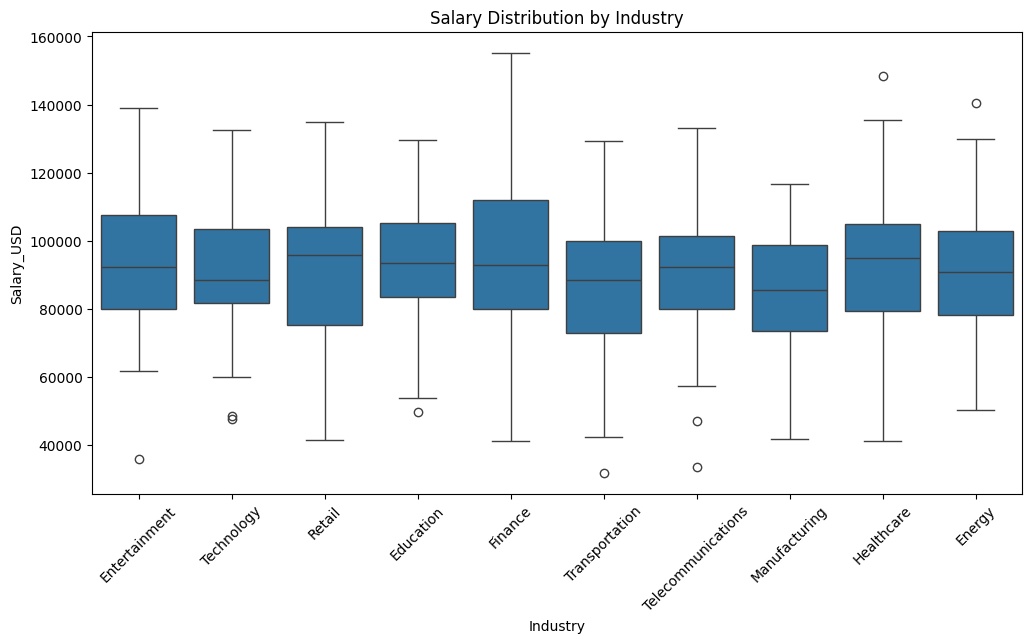

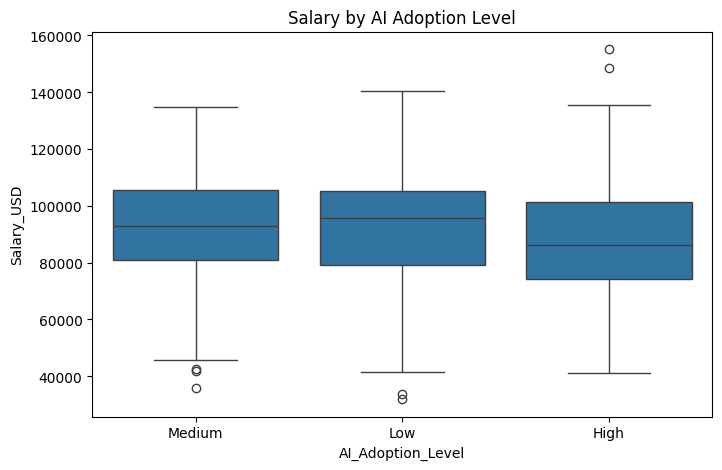

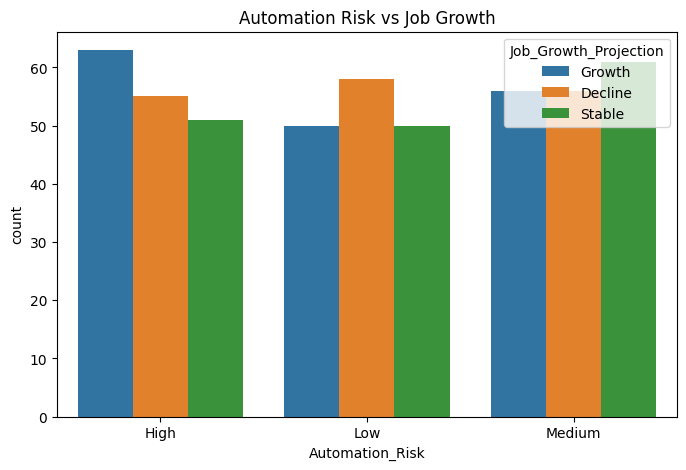

In [13]:
# Salary vs Industry
plt.figure(figsize=(12,6))
sns.boxplot(x='Industry', y='Salary_USD', data=df)
plt.xticks(rotation=45)
plt.title('Salary Distribution by Industry')
plt.show()

# AI Adoption vs Salary
plt.figure(figsize=(8,5))
sns.boxplot(x='AI_Adoption_Level', y='Salary_USD', data=df)
plt.title('Salary by AI Adoption Level')
plt.show()

# Automation Risk vs Job Growth Projection
plt.figure(figsize=(8,5))
sns.countplot(x='Automation_Risk', hue='Job_Growth_Projection', data=df)
plt.title('Automation Risk vs Job Growth')
plt.show()


# KPI Calculations

In [14]:
avg_salary = df['Salary_USD'].mean()
high_ai_jobs = (df['AI_Adoption_Level'] == 'High').mean() * 100
remote_jobs = (df['Remote_Friendly'] == 'Yes').mean() * 100

print("\n--- Key Metrics ---")
print(f"Average Salary: ${avg_salary:,.2f}")
print(f"High AI Adoption Jobs: {high_ai_jobs:.2f}%")
print(f"Remote-Friendly Jobs: {remote_jobs:.2f}%")

# Top 5 Skills
print("\nTop 5 Most In-Demand Skills:")
skills_series = df['Required_Skills'].str.split(',').explode().str.strip()
display(skills_series.value_counts().head(5))


--- Key Metrics ---
Average Salary: $91,222.39
High AI Adoption Jobs: 29.40%
Remote-Friendly Jobs: 50.20%

Top 5 Most In-Demand Skills:


Required_Skills
Python                60
Project Management    60
Cybersecurity         58
Machine Learning      52
Data Analysis         49
Name: count, dtype: int64